<a href="https://colab.research.google.com/github/shashwatb23/Sentiment-Analysis-of-Dunki/blob/main/Final_Project_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Given Statement :
You are given a dataset consisting of opinions given by 30 people regarding a video clip on salesman.

Objective : The main purpose behind this project is to analyse the various reviews by different genders and how the audience found this movie.




In [ ]:
import warnings
warnings.simplefilter(action= 'ignore', category=FutureWarning)

In [ ]:
import pandas
df = pandas.read_csv("/content/Clipping1.csv")

After Importing the CSV File, Now we segregated the reviews given by both male as well as female viewers. This function was performed with the help of location function of Pandas Module of Python

In [ ]:
df1 = ((df.loc[df.Gender=='male']))
df2 = df.loc[df.Gender=='female']

Now by the help of sentiment analysis, we rated the opinions given by various people as Positive, Negative and neutral. This task was performed with the help of the textblob module and pandas.

In [ ]:
from textblob import TextBlob
gst = []
comment = df["Word"].to_list()
b = len(comment)
rr = []
num = []
for i in range(0,b):
  num.append(i+1)
  d = TextBlob(comment[i])
  s = d.sentiment.polarity
  rr.append(s)
  if s>0:
    gst.append("Positive")
  elif s<0:
    gst.append("Negative")
  else:
    gst.append("Neutral")

df['Nature of Review'] = gst
df

,Respondents,Age,Gender,Word,Nature of Review
0,1,23,male,He is streeet smart,Positive
1,2,22,female,"True Salesman, intelligent",Positive
2,3,21,female,Corrupt and unethical,Negative
3,4,24,male,Strong presence of mind and shrewd,Positive
4,5,21,male,Clever and diplomatic,Positive
5,6,18,male,intelligent and practical,Positive
6,7,20,female,Smart Cheater,Positive
7,8,24,female,Unethical,Neutral
8,9,22,male,Practical,Neutral
9,10,21,male,Smart,Positive


To create a detailed analysis of the reviews, we created a wordcloud of all the reviews given by the audience using the wordcloud and matplotlib modules of Python.

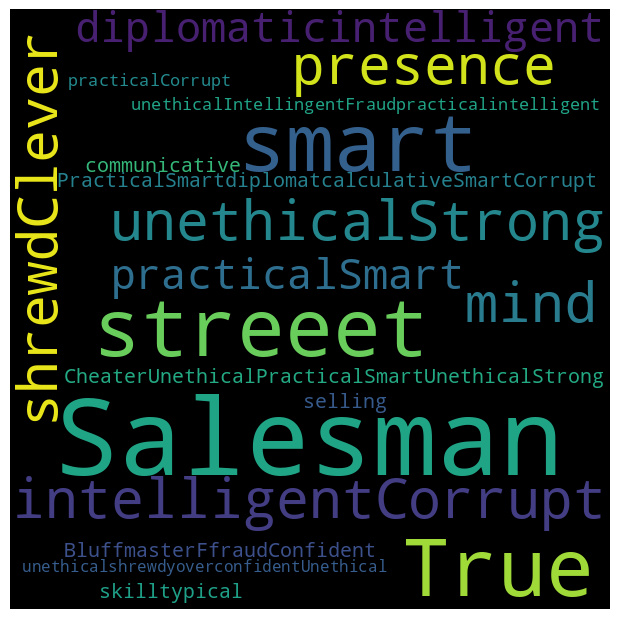

In [ ]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image
import matplotlib.pyplot as plt
w = set(STOPWORDS)
string = ""
for i in range(0,len(comment)):
  string = string + comment[i]
wordcloud = WordCloud(width = 600, height = 600,
                background_color ='black',
                stopwords = w,
                min_font_size = 10).generate(string)
plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

Then , we created a graph plotting the various reviews on a scale ranging from -1 to 1 using matplotlib in python.

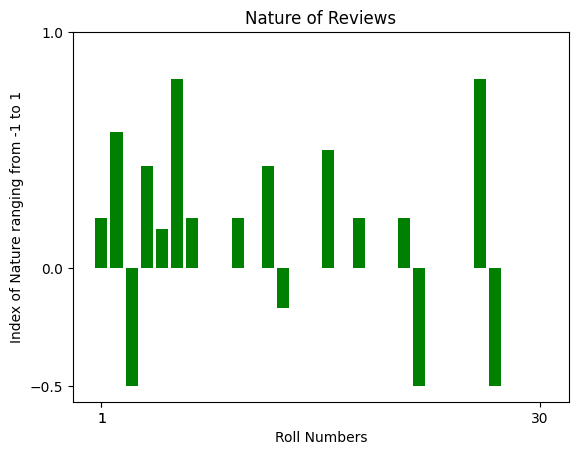

In [ ]:
plt.bar(num,rr, color= 'green')
plt.xticks([1,30,1])
plt.yticks([-0.5,1, 0])
plt.xlabel("Roll Numbers")
plt.ylabel("Index of Nature ranging from -1 to 1")
plt.title("Nature of Reviews")
plt.show()

Finally, using Chi square test we gave our final verdict on the reviews both, from the whole community as well as separate for both the gender of society.

In [ ]:
abc = 0
for i in range(0,len(rr)):
  abc = abc + rr[i]
total_rating = abc/len(rr)
total_rating
if total_rating > 0:
  print("Nature of reviews are positive according to people.")
else:
  print("Nature of reviews are not positive according to people.")


Nature of reviews are positive according to people.


In [ ]:
df = df[['Gender', 'Nature of Review']]
for col in df.columns:
    df[col] = df[col].fillna(df[col].mode()[0])
df.head()

<ipython-input-62-7094c84ea71e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(df[col].mode()[0])
<ipython-input-62-7094c84ea71e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(df[col].mode()[0])


,Gender,Nature of Review
0,male,Positive
1,female,Positive
2,female,Negative
3,male,Positive
4,male,Positive


In [ ]:
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
df.head()

,Gender,Nature of Review
0,1,2
1,0,2
2,0,0
3,1,2
4,1,2


In [ ]:
from sklearn.feature_selection import chi2
X = df.drop(columns=['Nature of Review'], axis=1)
y = df['Nature of Review']

In [ ]:
chi_scores = chi2(X, y)
chi_scores

(array([1.94642857]), array([0.37786651]))

Thank You